../_results_new/cheezit_single_side_down_nobg_sam_test/model_1/20230506-170511
../_results_new/cheezit_single_side_down_nobg_sam_test/model_2/20230506-170526
../_results_new/cheezit_single_side_down_nobg_sam_test/model_3/20230506-170541
../_results_new/cheezit_single_side_down_nobg_sam_test/model_4/20230506-170553
../_results_new/cheezit_single_side_down_nobg_sam_test/model_5/20230506-170606
../_results_new/cheezit_single_side_down_nobg_sam_test/model_6/20230506-170620
../_results_new/cheezit_single_side_down_nobg_sam_test/model_7/20230506-170636
../_results_new/cheezit_single_side_down_nobg_sam_test/model_8/20230506-170651
../_results_new/cheezit_single_side_down_nobg_sam_test/model_9/20230506-170704
../_results_new/cheezit_single_side_down_nobg_sam_test/model_10/20230506-170720
(10, 40, 200, 200, 3)
(40, 200, 200)
epistemic_val
0.0032851671837936715


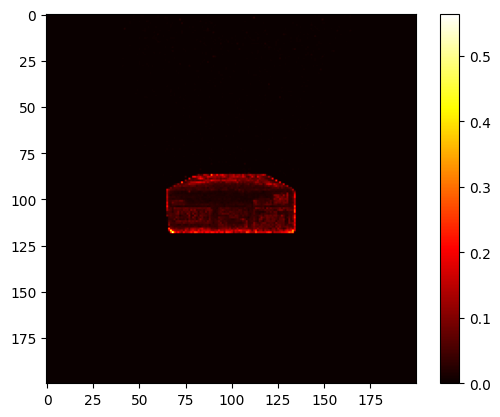

val
0.0032102873014842543


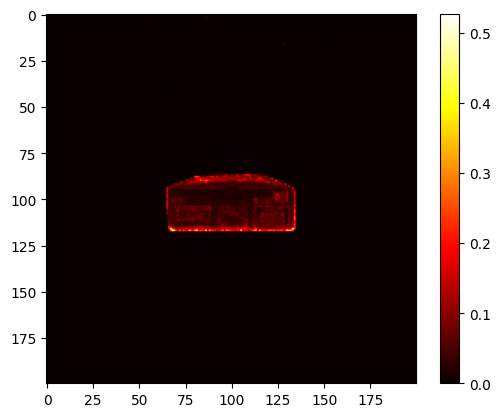

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

model_name = "cheezit_single_side_down_nobg_sam"
root_dir = '../_results_new/' + model_name + '/'
out_root_dir = "../density_aware_results/" + model_name + '/'

os.makedirs(out_root_dir, exist_ok=True)
os.makedirs(out_root_dir + 'rgb/', exist_ok=True)


all_images = []

for i in range(1,11):
    model_dir = os.path.join(root_dir, f"model_{i}")
    val_dir = os.path.join(model_dir, list(sorted(os.listdir(model_dir)))[0])
    print(val_dir)
    im_val_dir = os.path.join(val_dir, "val")

    images = []
    for im in sorted(os.listdir(im_val_dir)):
        images.append(cv2.imread(os.path.join(im_val_dir, im)))
    images = np.array(images)
    all_images.append(images)

all_images = np.array(all_images).squeeze()
print(all_images.shape)

ensemble_image_std = np.std(all_images, axis=0).mean(axis=-1)
print(ensemble_image_std.shape)


files = sorted(os.listdir(val_dir))
rgb = ensemble_image_std

rgb = rgb / rgb.max()

rgb_means = {}
tot_means = {}
for i in range(len(files)):
    filename = files[i].split('.')[0]
    print(files[i])  
    print(rgb[i].mean())

    rgb_means[filename] = float(rgb[i].mean())
    
    plt.clf()
    plt.imshow(rgb[i], cmap="hot")
    plt.colorbar()
    plt.savefig(f"{out_root_dir}rgb/{filename}.png")
    plt.show()

import json
json.dump(rgb_means, open(f"{out_root_dir}/rgb_means.json", "w"))
json.dump(tot_means, open(f"{out_root_dir}/total_means.json", "w"))
